In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
mat = np.load("total_matrix_true_negatives.npy")
mat_m = np.load("total_matrix_true_negatives_male.npy")
mat_f = np.load("total_matrix_true_negatives_female.npy")

In [47]:
val_max = np.max(mat_m)
print(val_max)

0.005127952222757751


In [48]:
mat = mat/val_max
mat_m = mat_m/ val_max
mat_f = mat_f/val_max

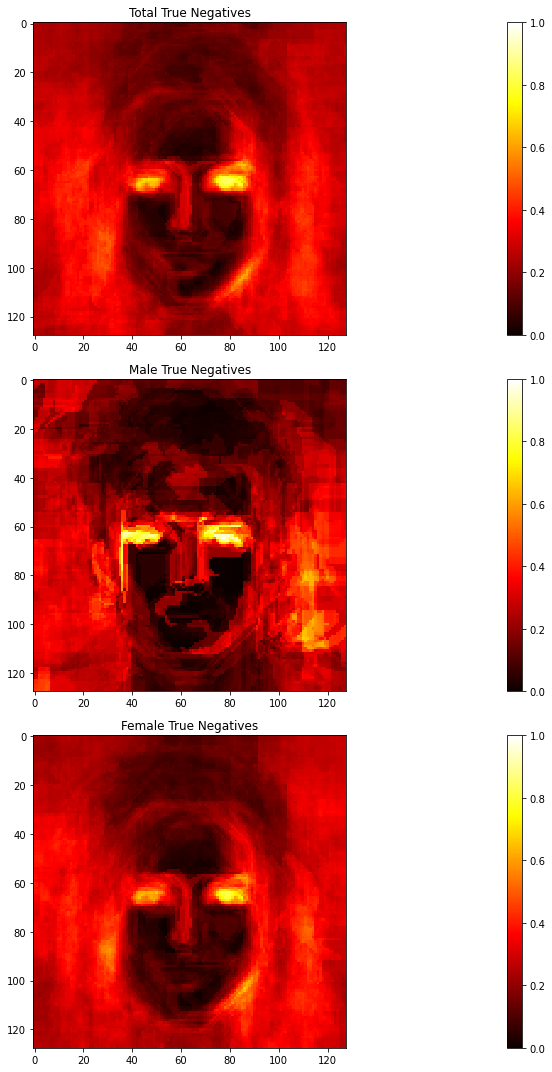

<Figure size 432x288 with 0 Axes>

In [50]:
val_max = np.max(mat_m)

mat = mat / val_max
mat_m = mat_m / val_max
mat_f = mat_f / val_max
plt.figure(figsize=(45, 15))
plt.subplot(311)
plt.imshow(mat, cmap='hot', interpolation='nearest', vmin=0, vmax=1)
plt.colorbar()
plt.title('Total True Negatives')

plt.subplot(312)
plt.imshow(mat_m, cmap='hot', interpolation='nearest', vmin=0, vmax=1)
plt.colorbar()
plt.title('Male True Negatives')

plt.subplot(313)
plt.imshow(mat_f, cmap='hot', interpolation='nearest', vmin=0, vmax=1)
plt.colorbar()
plt.title('Female True Negatives')

plt.tight_layout()
plt.show()
plt.savefig('3_true_negatives.jpg')

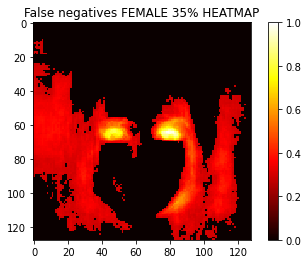

In [35]:

def top_percentage(array, percentage):
    m_val= np.max(array)
    array=array/m_val
    shp = array.shape
    flattened_array = array.flatten()
    sorted_indices = np.argsort(flattened_array)[::-1]  
    mat = np.zeros(128*128)
    j=0
    top = percentage*len(sorted_indices)
    for i in sorted_indices:
        if j>=top:
            mat[i]=0
        else:
            val = flattened_array[i]
            mat[i]=val
            j+=1    
    reshaped_matrix = mat.reshape(shp) 
    return reshaped_matrix/np.max(reshaped_matrix)

mat = np.load("total_matrix_false_negatives_female.npy")  

threshold_value = top_percentage(mat, 0.35)
plt.imshow(threshold_value, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('False negatives FEMALE 35% HEATMAP')
plt.show()
#sparse_matrix = np.where(original_matrix >= threshold_value, original_matrix, 0)

#print("Matriz original:")
#print(original_matrix)
#print("\nMatriz con solo el 20% de los valores más altos:")
#print(sparse_matrix)

